# Business understanding 
## Real world problem: How to increase property value for homeowners? 
### Who are the stakeholders? Homeowners 

#### This notebook should show how to increase proeprty value, by adding bathrooms and increasing the square foot living space.

In [1]:
# import libraries
import statsmodels.api as sm
import pandas as pd
import numpy as np
import os  
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Construct the absolute file path to your dataset
file_path = os.path.join(os.path.expanduser("~"), "Desktop", "housepj", "kc_house_data.csv")

# Read the CSV file and store it as a DataFrame
df = pd.read_csv(file_path)

# Review first 5 data 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>King County Housing Data Description</title>
</head>
<body>

<h1>Data Description for King County Housing Dataset</h1>

<table border="1">
    <tr>
        <th>Column</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>id</td>
        <td>Unique identifier for a house</td>
    </tr>
    <tr>
        <td>date</td>
        <td>Date the house was sold</td>
    </tr>
    <tr>
        <td>price</td>
        <td>Sale price (prediction target)</td>
    </tr>
    <tr>
        <td>bedrooms</td>
        <td>Number of bedrooms</td>
    </tr>
    <tr>
        <td>bathrooms</td>
        <td>Number of bathrooms</td>
    </tr>
    <tr>
        <td>sqft_living</td>
        <td>Square footage of living space in the home</td>
    </tr>
    <tr>
        <td>sqft_lot</td>
        <td>Square footage of the lot</td>
    </tr>
    <tr>
        <td>floors</td>
        <td>Number of floors (levels) in the house</td>
    </tr>
    <tr>
        <td>waterfront</td>
        <td>Whether the house is on a waterfront</td>
    </tr>
    <tr>
        <td>greenbelt</td>
        <td>Whether the house is adjacent to a green belt</td>
    </tr>
    <tr>
        <td>nuisance</td>
        <td>Whether the house has traffic noise or other recorded nuisances</td>
    </tr>
    <tr>
        <td>view</td>
        <td>Quality of view from the house</td>
    </tr>
    <tr>
        <td>condition</td>
        <td>Overall condition of the house (related to maintenance)</td>
    </tr>
    <tr>
        <td>grade</td>
        <td>Overall grade of the house (related to construction and design)</td>
    </tr>
    <tr>
        <td>heat_source</td>
        <td>Heat source for the house</td>
    </tr>
    <tr>
        <td>sewer_system</td>
        <td>Sewer system for the house</td>
    </tr>
    <tr>
        <td>sqft_above</td>
        <td>Square footage of the house apart from the basement</td>
    </tr>
    <tr>
        <td>sqft_basement</td>
        <td>Square footage of the basement</td>
    </tr>
    <tr>
        <td>sqft_garage</td>
        <td>Square footage of garage space</td>
    </tr>
    <tr>
        <td>sqft_patio</td>
        <td>Square footage of outdoor porch or deck space</td>
    </tr>
    <tr>
        <td>yr_built</td>
        <td>Year when the house was built</td>
    </tr>
    <tr>
        <td>yr_renovated</td>
        <td>Year when the house was renovated</td>
    </tr>
    <tr>
        <td>address</td>
        <td>Street address</td>
    </tr>
</table>

</body>
</html>




In [3]:
#descriptive statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [4]:
#display all columns 
pd.set_option('display.max_columns', None)
# Display all columns in the DataFrame
print(df)

               id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt nuisance     view 

In [5]:
### Pre cleaned data set has 30,155 houses

In [6]:
# Create a new column 'renovation_status' based on 'yr_renovated'
df['renovation_status'] = df['yr_renovated'].apply(lambda x: 'No Renovation' if x == 0 else 'Renovation')

# Display unique values to verify the changes
print(df['renovation_status'].unique())

# Display unique values of 'renovation_status'
print(df['renovation_status'].unique())

# Display value counts of 'renovation_status'
print(df['renovation_status'].value_counts())

import pandas as pd

# Assuming your DataFrame is named 'df'
renovation_stats = df.groupby('renovation_status')['price'].describe()

# Display the results
print(renovation_stats)

['No Renovation' 'Renovation']
['No Renovation' 'Renovation']
No Renovation    28783
Renovation        1372
Name: renovation_status, dtype: int64
                     count          mean           std      min       25%  \
renovation_status                                                           
No Renovation      28783.0  1.091996e+06  8.619636e+05  27360.0  643957.5   
Renovation          1372.0  1.455523e+06  1.395891e+06  30108.0  740375.0   

                         50%        75%         max  
renovation_status                                    
No Renovation       851450.0  1290000.0  30750000.0  
Renovation         1100000.0  1710875.0  23500000.0  


In [7]:
#display all columns 
pd.set_option('display.max_columns', None)
# Display all columns in the DataFrame
print(df)

               id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt nuisance     view 

In [8]:
# Display the bottom 10 values for sqft_lot
bottom_10_sqft_lot = df['sqft_lot'].value_counts().tail(10)
print(bottom_10_sqft_lot)


8861      1
340639    1
51872     1
17057     1
15022     1
12975     1
10940     1
33855     1
49857     1
4098      1
Name: sqft_lot, dtype: int64


In [9]:
# Display the bottom 10 values for sqft_lot
bottom_10_sqft_lot = df['sqft_lot'].value_counts().sort_index().head(10)
print(bottom_10_sqft_lot)


402    1
412    1
420    1
435    1
468    1
474    3
475    2
478    3
479    1
480    1
Name: sqft_lot, dtype: int64


In [10]:
top_10_sqft_lot = df['sqft_lot'].value_counts().sort_index().tail(10)
print(top_10_sqft_lot)


1277541    1
1354280    1
1400855    1
1480604    1
1576001    1
1722798    1
1951712    1
2657160    1
3067495    1
3253932    1
Name: sqft_lot, dtype: int64


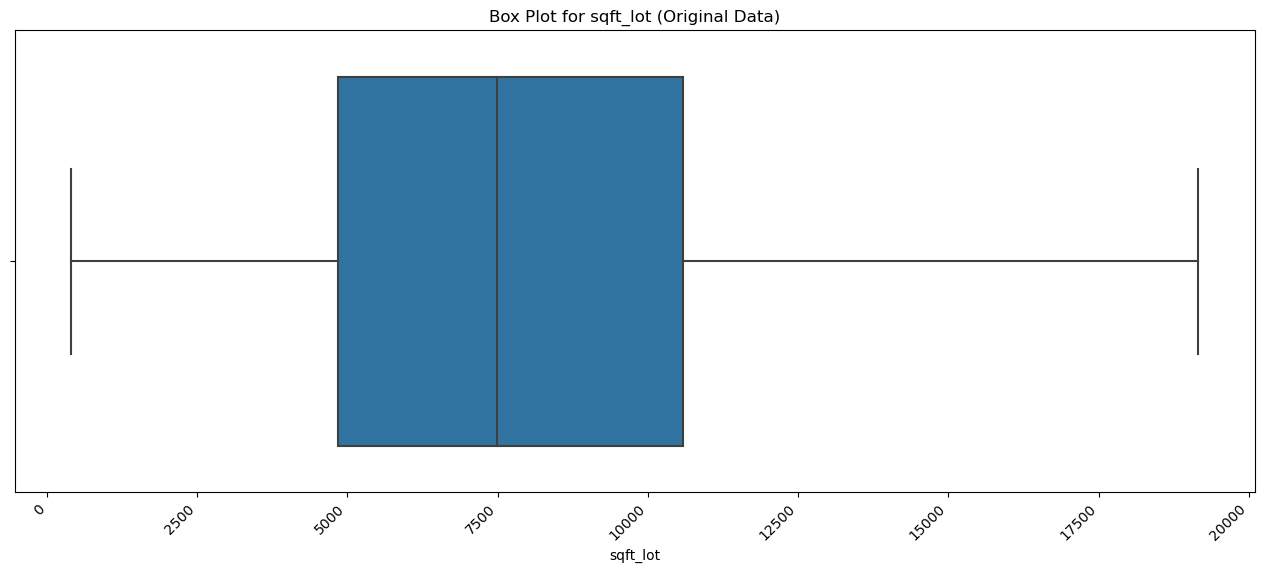

In [11]:
# Create a box plot for sqft_lot with actual values on the x-axis using the original DataFrame (df)
plt.figure(figsize=(16, 6))
sns.boxplot(x='sqft_lot', data=df, width=0.8, showfliers=False)
plt.title('Box Plot for sqft_lot (Original Data)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()



In [12]:
# Print summary statistics of the original DataFrame
print("Original DataFrame Summary:")
print(df['sqft_lot'].describe())




Original DataFrame Summary:
count    3.015500e+04
mean     1.672360e+04
std      6.038260e+04
min      4.020000e+02
25%      4.850000e+03
50%      7.480000e+03
75%      1.057900e+04
max      3.253932e+06
Name: sqft_lot, dtype: float64


In [13]:
# Print summary statistics of the original DataFrame
print("Original DataFrame Summary:")
print(df['sqft_above'].describe())

# Display the bottom 10 values for sqft_lot
bottom_10_sqft_above = df['sqft_above'].value_counts().sort_index().head(10)
print(bottom_10_sqft_above)

top_10_sqft_above = df['sqft_above'].value_counts().sort_index().tail(10)
print(top_10_sqft_above)


Original DataFrame Summary:
count    30155.000000
mean      1809.826098
std        878.306131
min          2.000000
25%       1180.000000
50%       1560.000000
75%       2270.000000
max      12660.000000
Name: sqft_above, dtype: float64
2      1
100    1
170    1
210    1
260    1
290    4
300    1
310    1
320    3
340    1
Name: sqft_above, dtype: int64
7780     2
8070     1
8280     1
8500     1
8710     1
8882     1
9410     1
9440     1
12470    1
12660    1
Name: sqft_above, dtype: int64


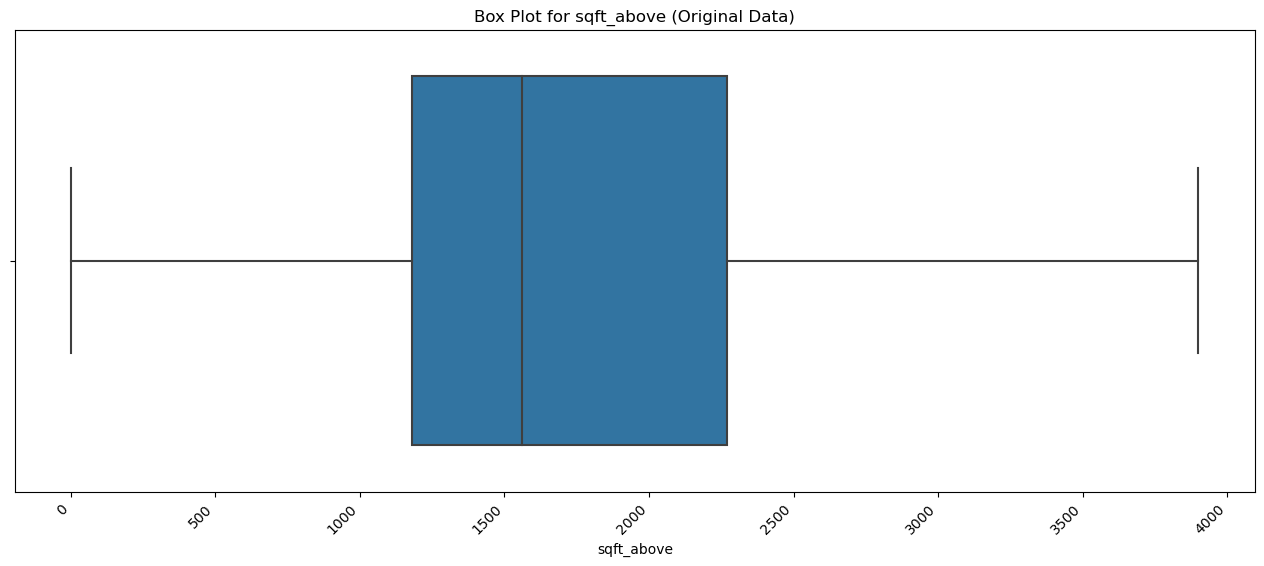

In [14]:
# Create a box plot for sqft_above with actual values on the x-axis using the original DataFrame (df)
plt.figure(figsize=(16, 6))
sns.boxplot(x='sqft_above', data=df, width=0.8, showfliers=False)
plt.title('Box Plot for sqft_above (Original Data)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [15]:
# Filter the DataFrame to exclude rows with specific values in 'sqft_above'
values_to_exclude = [2, 100, 170, 210, 260]
df_cleaned = df[~df['sqft_above'].isin(values_to_exclude)]

# Print summary statistics of the filtered DataFrame
print("(sqft_above) Summary:")
print(df_cleaned['sqft_above'].describe())


(sqft_above) Summary:
count    30150.000000
mean      1810.101625
std        878.117529
min        290.000000
25%       1180.000000
50%       1560.000000
75%       2270.000000
max      12660.000000
Name: sqft_above, dtype: float64


In [16]:
# Print summary statistics of the original DataFrame
print("Original DataFrame Summary:")
print(df['sqft_basement'].describe())

# Display the bottom 10 values for sqft_lot
bottom_10_sqft_basement = df['sqft_basement'].value_counts().sort_index().head(10)
print(bottom_10_sqft_basement)

top_10_sqft_basement = df['sqft_basement'].value_counts().sort_index().tail(10)
print(top_10_sqft_basement)
# Filter the DataFrame to exclude rows with outliers


Original DataFrame Summary:
count    30155.000000
mean       476.039396
std        579.631302
min          0.000000
25%          0.000000
50%          0.000000
75%        940.000000
max       8020.000000
Name: sqft_basement, dtype: float64
0      15471
1          1
60         1
70         3
80         9
90         2
100       10
110        7
120       10
130        6
Name: sqft_basement, dtype: int64
3810    1
3910    1
3960    1
4000    1
4130    1
4420    1
4520    1
5350    1
6970    1
8020    1
Name: sqft_basement, dtype: int64


In [17]:
# Create a DataFrame without 0 values in 'sqft_basement' for summary statistics
df_no_zeros = df_cleaned.query('sqft_basement > 0')

# Display summary statistics for 'sqft_basement' without 0 values
summary_no_zeros = df_no_zeros['sqft_basement'].describe()

# Print the summary statistics
print(summary_no_zeros)


count    14683.000000
mean       977.658993
std        446.739756
min         60.000000
25%        660.000000
50%        960.000000
75%       1220.000000
max       8020.000000
Name: sqft_basement, dtype: float64


In [18]:
# Filter the DataFrame to exclude rows with basement sizes of 1 and 60 sqft
df_cleaned = df_cleaned[(df_cleaned['sqft_basement'] != 1) & (df['sqft_basement'] != 60)]

# Print summary statistics of the filtered DataFrame
print("Basement DataFrame Summary:")
print(df_cleaned['sqft_basement'].describe())


Basement DataFrame Summary:
count    30149.000000
mean       476.132111
std        579.651627
min          0.000000
25%          0.000000
50%          0.000000
75%        940.000000
max       8020.000000
Name: sqft_basement, dtype: float64


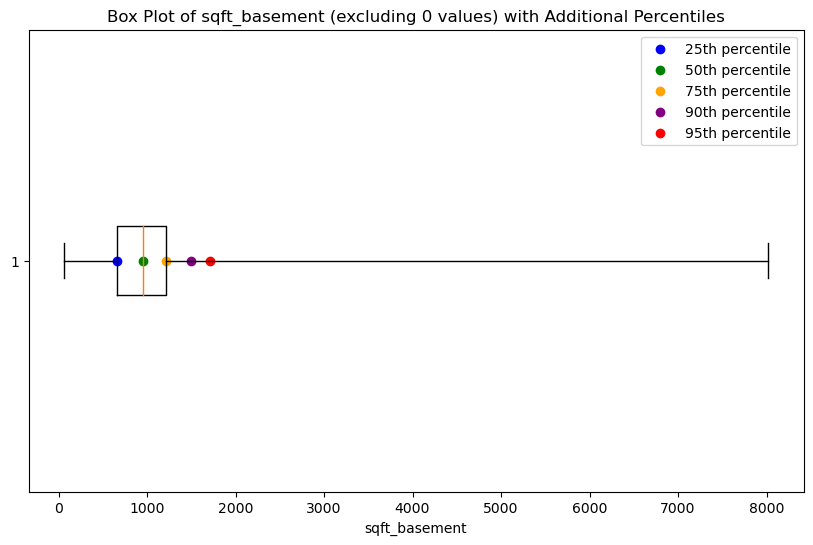

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Create a box plot for 'sqft_basement' without 0 values with additional percentiles
percentiles = [25, 50, 75, 90, 95]

plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(df_no_zeros['sqft_basement'], vert=False, whis=(0, 100))

# Calculate and plot custom percentiles with different colors
colors = ['blue', 'green', 'orange', 'purple', 'red']
percentile_values = np.percentile(df_no_zeros['sqft_basement'], percentiles)

for i, (percentile, color) in enumerate(zip(percentiles, colors)):
    plt.scatter(percentile_values[i], 1, marker='o', color=color, label=f'{percentile}th percentile')

plt.title('Box Plot of sqft_basement (excluding 0 values) with Additional Percentiles')
plt.xlabel('sqft_basement')
plt.legend()
plt.show()



In [20]:
# Print summary statistics of the original DataFrame
print("Original DataFrame Summary:")
print(df['sqft_garage'].describe())

# Display the bottom 10 values for sqft_lot
bottom_10_sqft_garage = df['sqft_garage'].value_counts().sort_index().head(10)
print(bottom_10_sqft_garage)

top_10_sqft_garage = df['sqft_garage'].value_counts().sort_index().tail(10)
print(top_10_sqft_garage)

Original DataFrame Summary:
count    30155.000000
mean       330.211142
std        285.770536
min          0.000000
25%          0.000000
50%        400.000000
75%        510.000000
max       3580.000000
Name: sqft_garage, dtype: float64
0      10009
1          1
40         1
70         2
80         5
90         2
100        3
110        5
120        4
130       12
Name: sqft_garage, dtype: int64
2190    1
2210    1
2240    1
2400    1
2530    1
2570    1
2840    1
3050    1
3390    1
3580    1
Name: sqft_garage, dtype: int64


In [21]:
# Create a DataFrame without 0 values in 'sqft_garage' for summary statistics
df_no_zerosg = df_cleaned.query('sqft_garage > 0')

# Display summary statistics for 'sqft_garage' without 0 values
summary_no_zerosg = df_no_zerosg['sqft_garage'].describe()

# Print the summary statistics
print(summary_no_zerosg)


count    20145.000000
mean       494.292182
std        202.824710
min         40.000000
25%        400.000000
50%        470.000000
75%        580.000000
max       3580.000000
Name: sqft_garage, dtype: float64


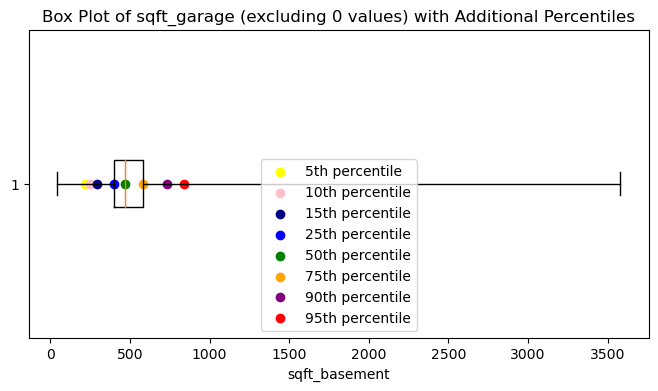

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Create a box plot for 'sqft_garage' without 0 values with additional percentiles
percentiles = [5, 10, 15, 25, 50, 75, 90, 95]

plt.figure(figsize=(8, 4))
boxplot = plt.boxplot(df_no_zerosg['sqft_garage'], vert=False, whis=(0, 100))

# Calculate and plot custom percentiles with different colors
colors = ['yellow', 'pink', 'navy', 'blue', 'green', 'orange', 'purple', 'red']
percentile_values = np.percentile(df_no_zerosg['sqft_garage'], percentiles)

for i, (percentile, color) in enumerate(zip(percentiles, colors)):
    plt.scatter(percentile_values[i], 1, marker='o', color=color, label=f'{percentile}th percentile')

plt.title('Box Plot of sqft_garage (excluding 0 values) with Additional Percentiles')
plt.xlabel('sqft_basement')
plt.legend()
plt.show()


In [23]:
df_no_zerosg
# Count the number of points in 'sqft_garage' less than 200
count_less_than_200 = (df_no_zerosg['sqft_garage'] < 200).sum()

# Print the result
print(f"Number of sqft_garage points less than 200: {count_less_than_200}")


Number of sqft_garage points less than 200: 408


In [24]:
# Define the cutoff values for outliers
lower_cutoff = 200

# Create a new DataFrame without outliers, but keep houses with 0 sqft_garage
df_cleaned = df_cleaned[((df_cleaned['sqft_garage'] > 0) & (df_cleaned['sqft_garage'] >= lower_cutoff)) | (df_cleaned['sqft_garage'] == 0)]

# Print the summary statistics for 'sqft_garage' in the new DataFrame
print(df_cleaned['sqft_garage'].describe())


count    29741.000000
mean       332.474597
std        287.079976
min          0.000000
25%          0.000000
50%        400.000000
75%        510.000000
max       3580.000000
Name: sqft_garage, dtype: float64


In [25]:
# Print summary statistics of the original DataFrame
print("Original DataFrame Summary:")
print(df['sqft_patio'].describe())

# Display the bottom 10 values for sqft_patio
bottom_10_sqft_patio = df['sqft_patio'].value_counts().sort_index().head(10)
print(bottom_10_sqft_patio)

top_10_sqft_patio = df['sqft_patio'].value_counts().sort_index().tail(10)
print(top_10_sqft_patio)

Original DataFrame Summary:
count    30155.000000
mean       217.412038
std        245.302792
min          0.000000
25%         40.000000
50%        150.000000
75%        320.000000
max       4370.000000
Name: sqft_patio, dtype: float64
0     6760
8        1
10      20
12       1
14       1
15       5
18       1
20     124
22       1
24       3
Name: sqft_patio, dtype: int64
2210    1
2280    1
2350    2
2360    1
2500    1
2590    1
2880    1
2940    1
3550    1
4370    1
Name: sqft_patio, dtype: int64


In [26]:
# Create a DataFrame without 0 values in 'sqft_patio' for summary statistics
df_no_zerosp = df_cleaned.query('sqft_patio > 0')

# Display summary statistics for 'sqft_patio' without 0 values
summary_no_zerosp = df_no_zerosp['sqft_patio'].describe()

# Print the summary statistics
print(summary_no_zerosp)


count    23145.000000
mean       281.028213
std        245.481724
min          8.000000
25%        110.000000
50%        220.000000
75%        380.000000
max       4370.000000
Name: sqft_patio, dtype: float64


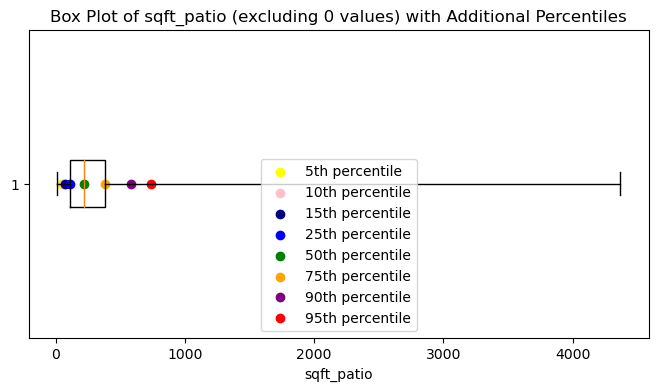

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Create a box plot for 'sqft_patio' without 0 values with additional percentiles
percentiles = [5, 10, 15, 25, 50, 75, 90, 95]

plt.figure(figsize=(8, 4))
boxplot = plt.boxplot(df_no_zerosp['sqft_patio'], vert=False, whis=(0, 100))

# Calculate and plot custom percentiles with different colors
colors = ['yellow', 'pink', 'navy', 'blue', 'green', 'orange', 'purple', 'red']
percentile_values = np.percentile(df_no_zerosp['sqft_patio'], percentiles)

for i, (percentile, color) in enumerate(zip(percentiles, colors)):
    plt.scatter(percentile_values[i], 1, marker='o', color=color, label=f'{percentile}th percentile')

plt.title('Box Plot of sqft_patio (excluding 0 values) with Additional Percentiles')
plt.xlabel('sqft_patio')
plt.legend()
plt.show()

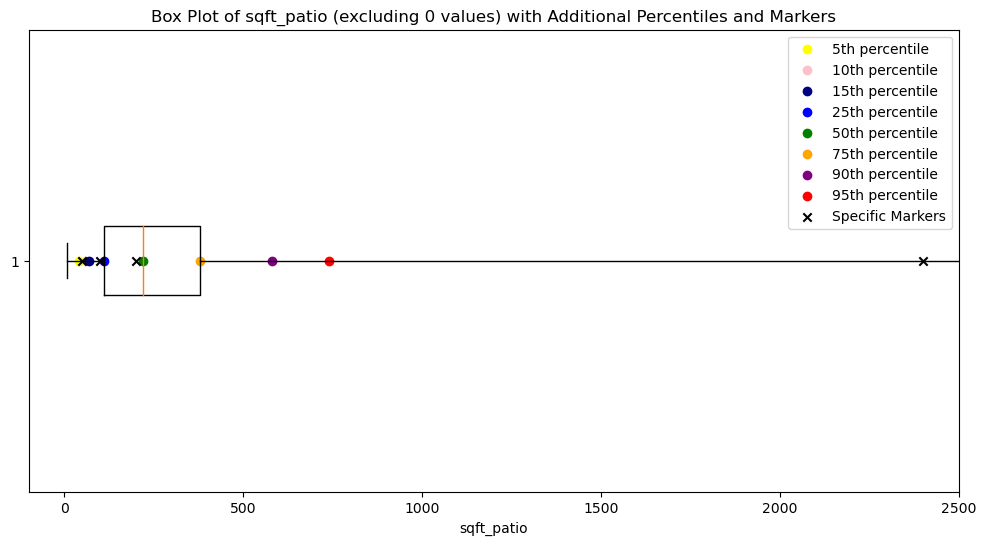

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Create a box plot for 'sqft_patio' without 0 values with additional percentiles
percentiles = [5, 10, 15, 25, 50, 75, 90, 95]

plt.figure(figsize=(12, 6))
boxplot = plt.boxplot(df_no_zerosp['sqft_patio'], vert=False, whis=(0, 100))

# Calculate and plot custom percentiles with different colors
colors = ['yellow', 'pink', 'navy', 'blue', 'green', 'orange', 'purple', 'red']
percentile_values = np.percentile(df_no_zerosp['sqft_patio'], percentiles)

for i, (percentile, color) in enumerate(zip(percentiles, colors)):
    plt.scatter(percentile_values[i], 1, marker='o', color=color, label=f'{percentile}th percentile')

# Set x-axis limits
plt.xlim(-100, 2500)

# Add specific markers for 50, 100, 200-2400
plt.scatter([50, 100, 200, 2400], [1, 1, 1, 1], marker='x', color='black', label='Specific Markers')

plt.title('Box Plot of sqft_patio (excluding 0 values) with Additional Percentiles and Markers')
plt.xlabel('sqft_patio')
plt.legend()
plt.show()


In [29]:


# Define the cutoff values for outliers
lower_cutoff = 50

# Create a new DataFrame without outliers, but keep houses with 0 sqft_garage
df_cleaned = df_cleaned[((df_cleaned['sqft_patio'] > 0) & (df_cleaned['sqft_patio'] >= lower_cutoff)) | (df_cleaned['sqft_patio'] == 0)]

# Print the summary statistics for 'sqft_garage' in the new DataFrame
print(df_cleaned['sqft_patio'].describe())


count    28515.000000
mean       226.568438
std        248.245577
min          0.000000
25%         50.000000
50%        160.000000
75%        330.000000
max       4370.000000
Name: sqft_patio, dtype: float64



# Cleaning the data

## In order to properly interpert the data, removal of missing data and duplicates is needed.


In [30]:
# 1. Handling Missing Values
df_cleaned = df.dropna()  # Drop rows with missing values
# 2. Handling Duplicates
df_cleaned = df_cleaned.drop_duplicates()  # Remove duplicate rows

In [31]:
#display all columns and check if missing values were removed
pd.set_option('display.max_columns', None)

# Display all columns in the DataFrame
print(df_cleaned)

               id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt nuisance     view 

# Removal of uncessary columns 
## In this situation it was important to remove certain variables to better interpret the data. Some reasons for removing these columns included the lack of control the homewoner has on the variable. For instance the homeowner cannot change the address, latitude, logntude, or the year built, ect.

# Search for outliers 

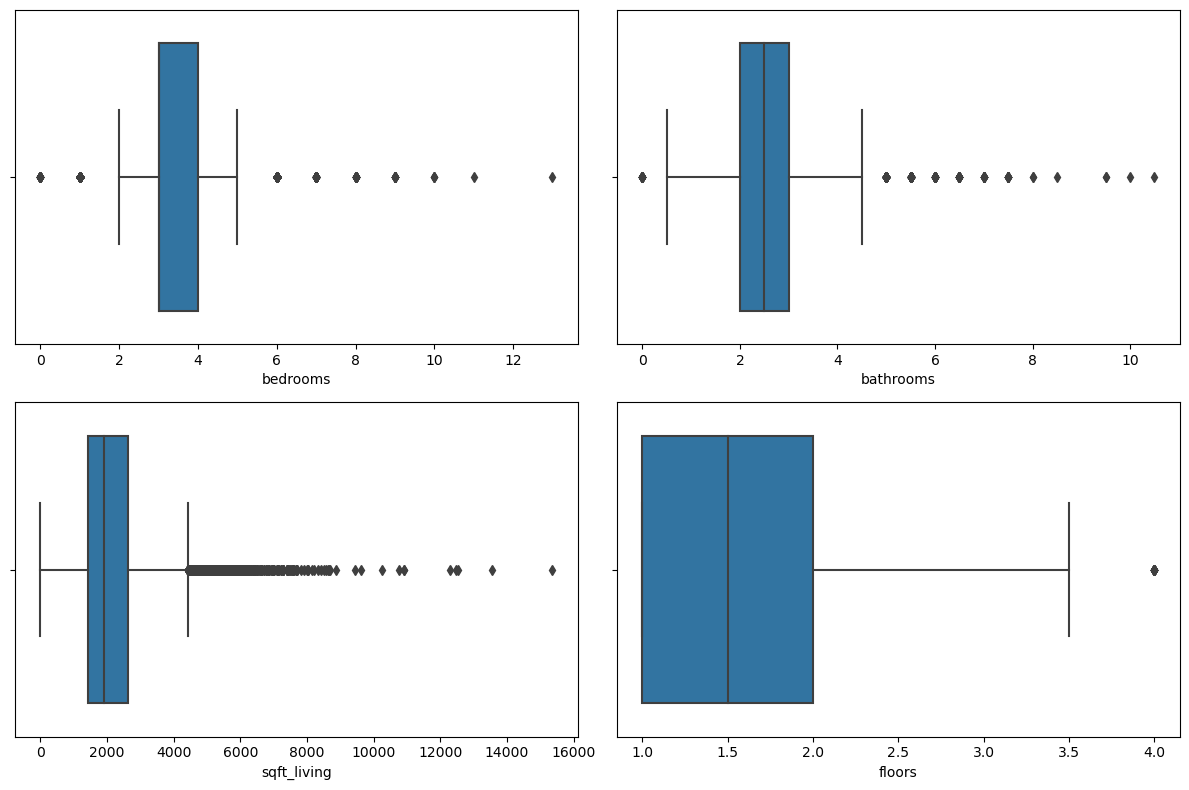

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_cleaned is your cleaned DataFrame
variables_to_plot = ['bedrooms', 'bathrooms', 'sqft_living', 'floors']

# Set the figure size
plt.figure(figsize=(12, 8))

# Create individual box plots for each variable
for i, variable in enumerate(variables_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=variable, data=df_cleaned)

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()


In [33]:

# Display the bottom 10 values for sqft_living
bottom_10_sqft_living = df_cleaned.sort_values(by='sqft_living').head(10)
print(bottom_10_sqft_living[['sqft_living']])


       sqft_living
14977            3
8694           260
8391           290
23622          290
5811           290
11989          310
476            320
13015          320
11420          320
29356          340


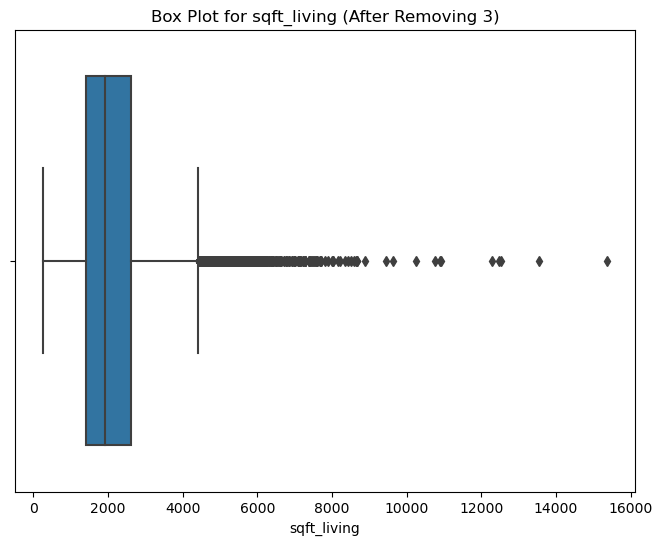

In [34]:

# Remove the specified value (3) for sqft_living
df_cleaned_filtered_sqft = df_cleaned[df_cleaned['sqft_living'] != 3]

# Create a new box plot for sqft_living after removal
plt.figure(figsize=(8, 6))
sns.boxplot(x='sqft_living', data=df_cleaned_filtered_sqft)
plt.title('Box Plot for sqft_living (After Removing 3)')
plt.show()


In [35]:
# Display the bottom 10 values for sqft_living
bottom_10_bedrooms = df_cleaned.sort_values(by='bedrooms').head(10)
print(bottom_10_bedrooms[['bedrooms']])


       bedrooms
19686         0
8338          0
8694          0
1310          0
12864         0
573           0
1289          0
5811          0
16787         0
16521         0


In [36]:
#Display unique values to verify the changes
print(df_cleaned['bedrooms'].unique())

[ 4  5  6  3  2  1  8 10  7  0  9 11 13]


In [37]:
#Remove homes with less than 1 bedroom
df_cleaned = df_cleaned[df_cleaned['bedrooms'] != 0]
#Display unique values to verify the changes
print(df_cleaned['bedrooms'].unique())

[ 4  5  6  3  2  1  8 10  7  9 11 13]


In [38]:
#Display unique values to verify the changes
print(df_cleaned['bathrooms'].unique())

[ 1.   2.5  2.   3.   1.5  3.5  4.   5.5  4.5  5.   7.5  6.   9.5  6.5
  7.   0.5 10.5  8.   0.  10.   8.5]


In [39]:
df_cleaned = df_cleaned[(df_cleaned['bathrooms'] != 0) & (df_cleaned['bathrooms'] != 0.5)]
# Display unique values to verify the changes
print(df_cleaned['bathrooms'].unique())


[ 1.   2.5  2.   3.   1.5  3.5  4.   5.5  4.5  5.   7.5  6.   9.5  6.5
  7.  10.5  8.  10.   8.5]


In [40]:
#Display unique values to verify the changes
print(df_cleaned['floors'].unique())

[1.  2.  1.5 3.  2.5 4.  3.5]


In [41]:
#descriptive statistics
df_cleaned.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.006200e+04,3.006200e+04,30062.000000,30062.000000,30062.000000,3.006200e+04,30062.000000,30062.000000,30062.000000,30062.000000,30062.000000,30062.000000,30062.000000,30062.000000,30062.000000
mean,4.539516e+09,1.108769e+06,3.419899,2.338550,2114.614330,1.660457e+04,1.543044,1811.144701,477.145200,330.809394,217.694332,1975.153749,90.806999,47.328463,-121.318416
std,2.882569e+09,8.938315e+05,0.972436,0.885519,972.460457,5.951967e+04,0.566942,877.234560,579.829633,285.682708,245.385208,32.041445,416.226781,1.433399,5.725870
min,1.000055e+06,2.736000e+04,1.000000,1.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.070475e+09,6.495000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405378,-122.325979
50%,3.875000e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.478000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551443,-122.225558
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2620.000000,1.056250e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669889,-122.116404
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [42]:
#display all columns and check if missing values were removed
pd.set_option('display.max_columns', None)

# Display all columns in the DataFrame
print(df_cleaned)

               id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt nuisance     view 

In [43]:
# List of columns to remove
columns_to_remove = ['address','lat', 'long','date','yr_built', 'yr_renovated', 'greenbelt', 'view','waterfront']

# Drop the columns from the DataFrame
df_cleaned = df_cleaned.drop(columns=columns_to_remove)

# Display the first few rows of the resulting DataFrame
print(df_cleaned.head())

           id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7399300360  675000.0         4        1.0         1180      7140     1.0   
1  8910500230  920000.0         5        2.5         2770      6703     1.0   
2  1180000275  311000.0         6        2.0         2880      6156     1.0   
3  1604601802  775000.0         3        3.0         2160      1400     2.0   
4  8562780790  592500.0         2        2.0         1120       758     2.0   

  nuisance condition      grade  heat_source sewer_system  sqft_above  \
0       NO      Good  7 Average          Gas       PUBLIC        1180   
1      YES   Average  7 Average          Oil       PUBLIC        1570   
2       NO   Average  7 Average          Gas       PUBLIC        1580   
3       NO   Average   9 Better          Gas       PUBLIC        1090   
4      YES   Average  7 Average  Electricity       PUBLIC        1120   

   sqft_basement  sqft_garage  sqft_patio renovation_status  
0              0        

# Making Categorical Data Interpretable 
## It is necessary to create dumie variables inorder to interpreate the results of catagorical data and its impacts on price.

In [44]:
# Encoding Categorical Variables
df_cleaned = pd.get_dummies(df_cleaned, columns=['condition', 'heat_source', 'renovation_status', 'grade', 'nuisance', 'sewer_system'])


In [45]:
#checking to see if dummie variables were encoded for categorical Variables
# 3. Encoding Categorical Variables
print(df_cleaned)

               id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7399300360   675000.0         4        1.0         1180      7140   
1      8910500230   920000.0         5        2.5         2770      6703   
2      1180000275   311000.0         6        2.0         2880      6156   
3      1604601802   775000.0         3        3.0         2160      1400   
4      8562780790   592500.0         2        2.0         1120       758   
...           ...        ...       ...        ...          ...       ...   
30150  7834800180  1555000.0         5        2.0         1910      4000   
30151   194000695  1313000.0         3        2.0         2020      5800   
30152  7960100080   800000.0         3        2.0         1620      3600   
30153  2781280080   775000.0         3        2.5         2570      2889   
30154  9557800100   500000.0         3        1.5         1200     11058   

       floors  sqft_above  sqft_basement  sqft_garage  sqft_patio  \
0         1.0     

In [46]:
# Display the column names in your DataFrame
print(df_cleaned.columns)


Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'condition_Average', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very Good', 'heat_source_Electricity',
       'heat_source_Electricity/Solar', 'heat_source_Gas',
       'heat_source_Gas/Solar', 'heat_source_Oil', 'heat_source_Oil/Solar',
       'heat_source_Other', 'renovation_status_No Renovation',
       'renovation_status_Renovation', 'grade_10 Very Good',
       'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion',
       'grade_2 Substandard', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better', 'nuisance_NO', 'nuisance_YES', 'sewer_system_PRIVATE',
       'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBLIC',
       'sewer_system_PUBLIC RESTRICTED'],
      dtype='object')


# Using StatsModels for Multiple Linear Regression

In [47]:
# Price is the target variable
target_variable = 'price'

# Create predictors
predictors = df_cleaned.drop([target_variable], axis=1)

# Create model intercept
predictors_int = sm.add_constant(predictors)

# Fit multiple linear regression model to data
model = sm.OLS(df_cleaned[target_variable], predictors_int).fit()

# Print model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     829.2
Date:                Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:11:07   Log-Likelihood:            -4.4423e+05
No. Observations:               30062   AIC:                         8.885e+05
Df Residuals:                   30025   BIC:                         8.888e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [48]:
# view model coefficients
model.params


const                              5.406168e+05
id                                -5.136487e-06
bedrooms                          -6.661735e+04
bathrooms                          6.948988e+04
sqft_living                        9.477290e+01
sqft_lot                           2.620151e-01
floors                            -9.957322e+04
sqft_above                         2.584725e+02
sqft_basement                      1.930793e+02
sqft_garage                       -3.105642e+02
sqft_patio                         2.011586e+02
condition_Average                  6.519244e+04
condition_Fair                     6.436711e+04
condition_Good                     1.516812e+05
condition_Poor                     3.277616e+04
condition_Very Good                2.266000e+05
heat_source_Electricity            3.571979e+04
heat_source_Electricity/Solar     -2.529195e+04
heat_source_Gas                    4.807805e+04
heat_source_Gas/Solar              2.390056e+05
heat_source_Oil                    8.864

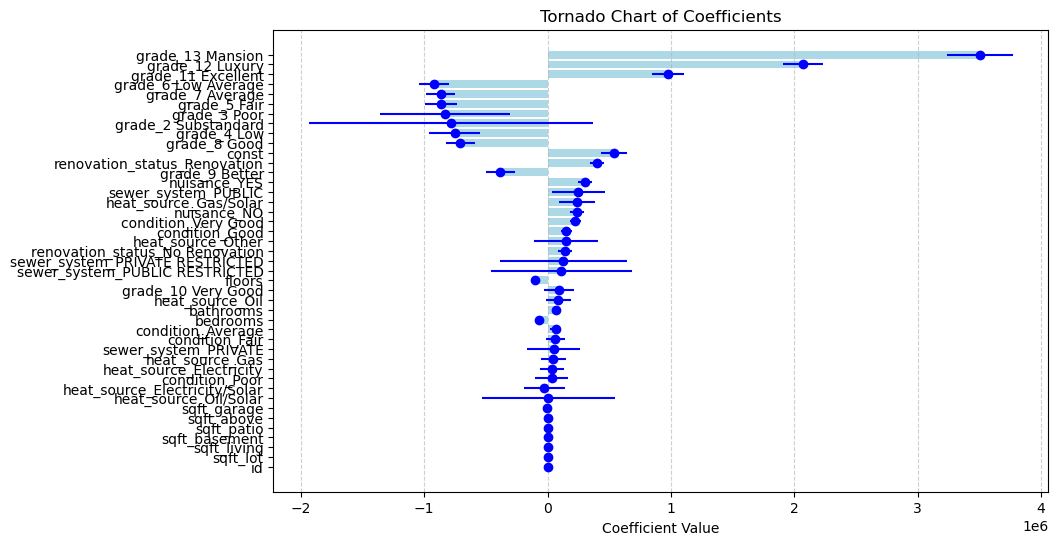

In [49]:

# Extract the coefficients and their standard errors from the regression summary
coefficients = model.params
standard_errors = model.bse

# Calculate the lower and upper bounds for each coefficient
lower_bound = coefficients - 1.96 * standard_errors
upper_bound = coefficients + 1.96 * standard_errors

# Sort the coefficients based on their impact on the dependent variable
sorted_indices = np.argsort(np.abs(coefficients))

# Create a tornado chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients)), coefficients[sorted_indices], color='lightblue')
plt.errorbar(coefficients[sorted_indices], range(len(coefficients)),
             xerr=1.96 * standard_errors[sorted_indices], fmt='o', color='blue', label='95% CI')

plt.yticks(range(len(coefficients)), coefficients.index[sorted_indices])
plt.xlabel('Coefficient Value')
plt.title('Tornado Chart of Coefficients')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


# Working with only statistically significant data
## Data with p values <.05

In [50]:
# Filter coefficients based on p-values
significant_vars = model.params[model.pvalues < 0.05]

# Display coefficients of significant variables
print(significant_vars)


const                              5.406168e+05
id                                -5.136487e-06
bedrooms                          -6.661735e+04
bathrooms                          6.948988e+04
sqft_living                        9.477290e+01
sqft_lot                           2.620151e-01
floors                            -9.957322e+04
sqft_above                         2.584725e+02
sqft_basement                      1.930793e+02
sqft_garage                       -3.105642e+02
sqft_patio                         2.011586e+02
condition_Average                  6.519244e+04
condition_Good                     1.516812e+05
condition_Very Good                2.266000e+05
heat_source_Gas/Solar              2.390056e+05
renovation_status_No Renovation    1.423634e+05
renovation_status_Renovation       3.982534e+05
grade_11 Excellent                 9.744490e+05
grade_12 Luxury                    2.070678e+06
grade_13 Mansion                   3.507466e+06
grade_3 Poor                      -8.294

In [51]:
import statsmodels.api as sm

# Ensure 'const' is in the index of significant_vars
if 'const' not in significant_vars.index:
    significant_vars.loc['const'] = 0  # You can set it to 0 or any appropriate value

# List of significant variable names (including 'const')
significant_vars_names = significant_vars.index.tolist()

# Check if 'const' is in df_cleaned columns
if 'const' not in df_cleaned.columns:
    # If not, add 'const' to the DataFrame
    df_cleaned['const'] = 1

# Create predictors using only statistically significant variables
significant_vars_data = df_cleaned[significant_vars_names]

# Fit multiple linear regression model to data using only significant variables
model_significant = sm.OLS(df_cleaned[target_variable], significant_vars_data).fit()

# Print model summary
print(model_significant.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     1105.
Date:                Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:11:08   Log-Likelihood:            -4.4424e+05
No. Observations:               30062   AIC:                         8.885e+05
Df Residuals:                   30034   BIC:                         8.888e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

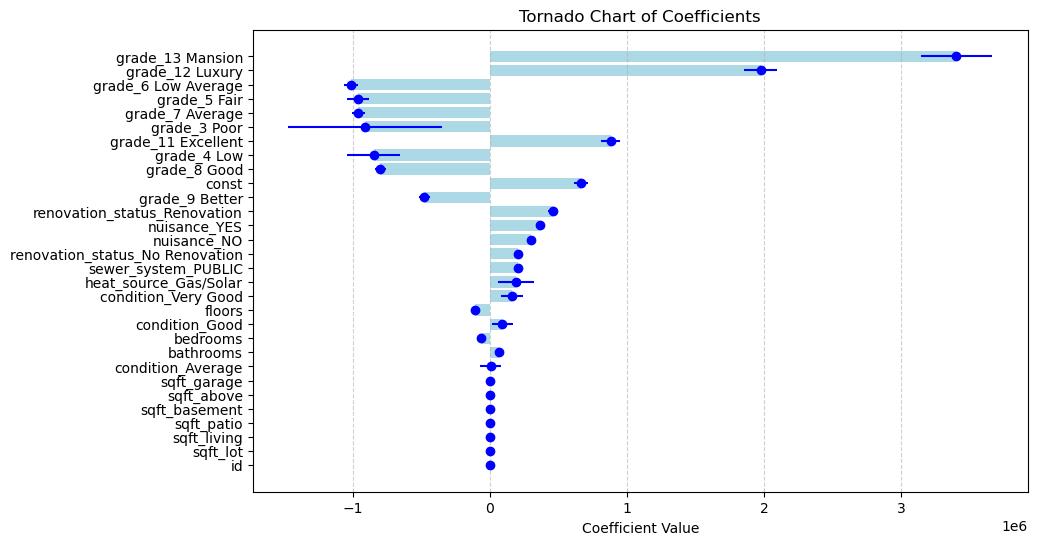

In [52]:
# Extract the coefficients and their standard errors from the regression summary
coefficients = model_significant.params
standard_errors = model_significant.bse

# Calculate the lower and upper bounds for each coefficient
lower_bound = coefficients - 1.96 * standard_errors
upper_bound = coefficients + 1.96 * standard_errors

# Sort the coefficients based on their impact on the dependent variable
sorted_indices = np.argsort(np.abs(coefficients))

# Create a tornado chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients)), coefficients[sorted_indices], color='lightblue')
plt.errorbar(coefficients[sorted_indices], range(len(coefficients)),
             xerr=1.96 * standard_errors[sorted_indices], fmt='o', color='blue', label='95% CI')

plt.yticks(range(len(coefficients)), coefficients.index[sorted_indices])
plt.xlabel('Coefficient Value')
plt.title('Tornado Chart of Coefficients')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

plt.show()


In [53]:
# return the standard error for 
# all coefficients in the equation
model_significant.bse

const                               25906.491101
id                                      0.000001
bedrooms                             5321.518732
bathrooms                            7344.536362
sqft_living                            17.210892
sqft_lot                                0.066941
floors                               9010.169331
sqft_above                             17.134776
sqft_basement                          12.341046
sqft_garage                            16.830776
sqft_patio                             16.927664
condition_Average                   38866.381292
condition_Good                      39100.609973
condition_Very Good                 40104.644299
heat_source_Gas/Solar               65907.264104
renovation_status_No Renovation     14476.510394
renovation_status_Renovation        16942.714154
grade_11 Excellent                  36300.763018
grade_12 Luxury                     61440.582547
grade_13 Mansion                   133933.864716
grade_3 Poor        

In [54]:
from sklearn.metrics import mean_absolute_error

# Assuming df_cleaned is your DataFrame with the cleaned data
predicted_price = model_significant.predict(significant_vars_data)
mae = mean_absolute_error(df_cleaned['price'], predicted_price)

print(f'Mean Absolute Error (MAE): {mae}')



Mean Absolute Error (MAE): 342398.16915083554


In [55]:
# Replace 'model' with your actual regression model variable (e.g., 'model_significant')
rmse_residuals = np.sqrt(model_significant.mse_resid)

# View Root Mean Squared Error for residuals
print(f'Root Mean Squared Error for Residuals: {rmse_residuals}')


Root Mean Squared Error for Residuals: 633413.1578769524


In [56]:
# RMSE is larger than MAE possibly becasue of outliers. 

In [57]:
# Check for linearity

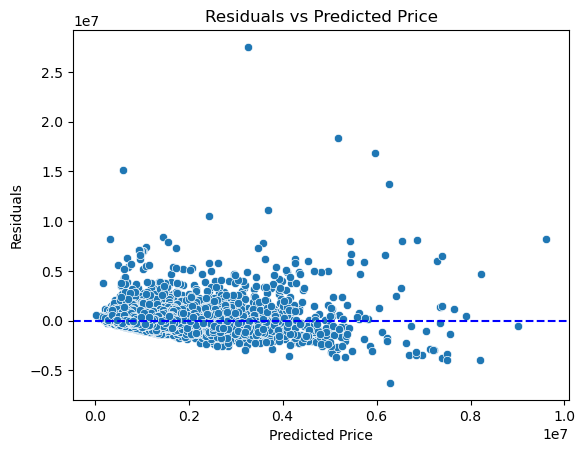

In [58]:
#Checking for Homoscedasticity

y_pred = model_significant.predict(significant_vars_data)  # Replace with your actual predicted values
residuals = df_cleaned['price'] - y_pred  # Calculate residuals

# Create a DataFrame with predicted values and residuals
residuals_df = pd.DataFrame({'Predicted Price': y_pred, 'Residuals': residuals})

# Plot residuals against predicted values
p = sns.scatterplot(x='Predicted Price', y='Residuals', data=residuals_df)
plt.axhline(y=0, color='blue', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Price')
plt.show()


In [59]:
#Garefield test

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# Assuming residuals is the residuals from your regression model, and predictors_int is the variable related to heteroscedasticity
test = sms.het_goldfeldquandt(residuals, predictors_int)
name = ['F statistic', 'p-value']

# Display the results
lzip(name, test)


[('F statistic', 0.9564616606223117), ('p-value', 0.9967877768534373)]

In [60]:
# Pvalue is >.05 we cannot reject the null, and we can inccur that our residuals are homscatstic

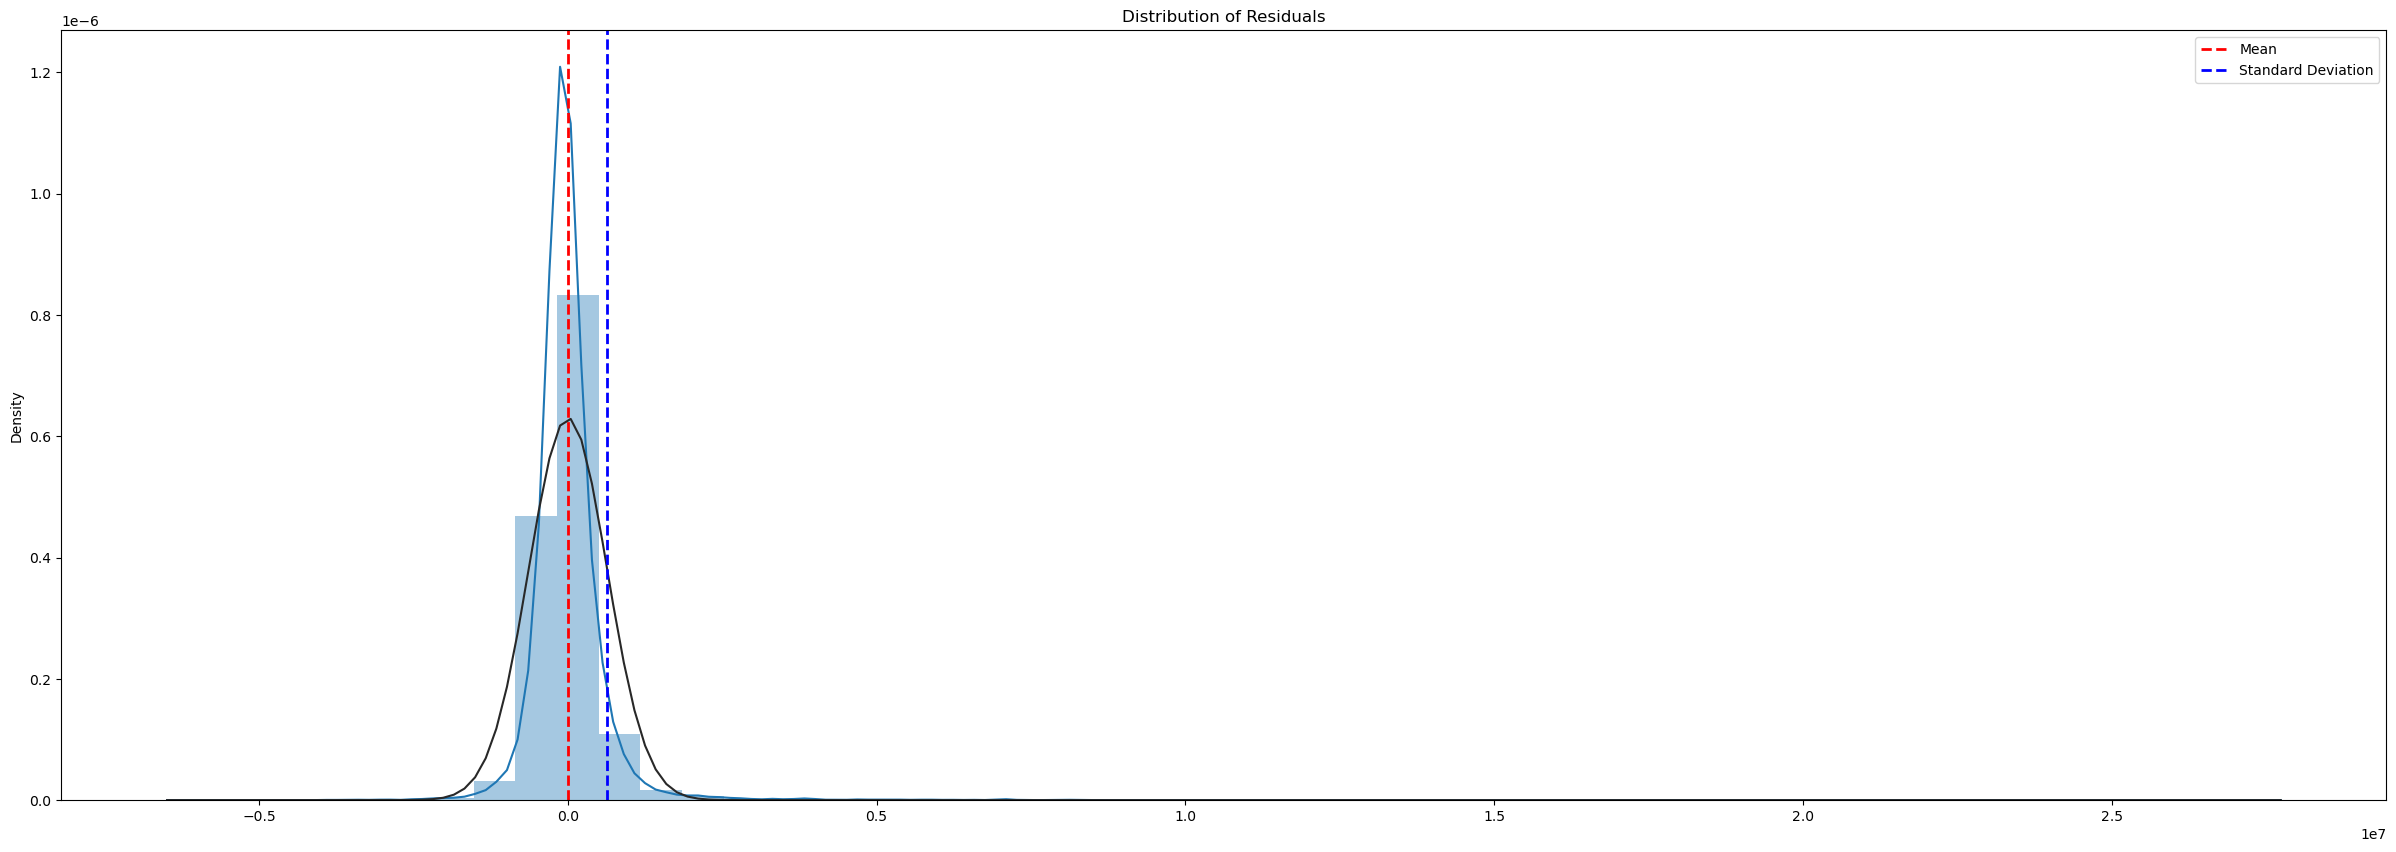

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming residuals is the residuals from your regression model
residuals = df_cleaned['price'] - y_pred  # Update with your actual residuals

# Set a larger figure size
plt.figure(figsize=(30, 10))

# Plot the distribution of residuals
p = sns.distplot(residuals, fit=norm, kde=True)
p = plt.title('Distribution of Residuals')

# Optionally, you can add a line to represent a normal distribution
plt.axvline(residuals.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(residuals.std(), color='blue', linestyle='dashed', linewidth=2, label='Standard Deviation')

# Show legend
plt.legend()

# Show the plot
plt.show()



In [62]:
# import stats module from scipy
from scipy import stats

# create mean and standard deviation
mu, std = stats.norm.fit(residuals)
mu, std

(-0.00020116301592112016, 633118.1059823782)

-0.00020116301592112016 633118.1059823782


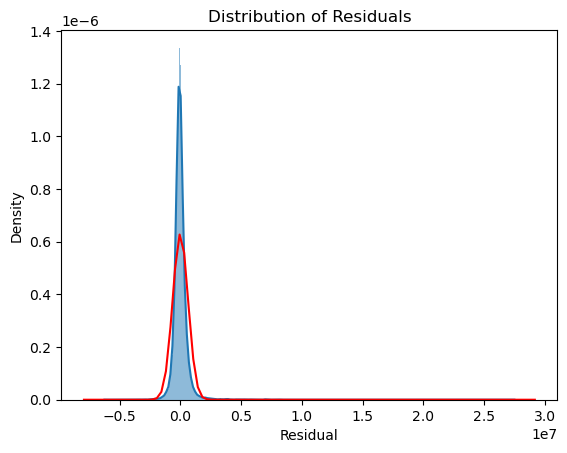

In [63]:
# import stats module from scipy
from scipy import stats

# create mean and standard deviation
mu, std = stats.norm.fit(residuals)
print(mu, std)  # Make sure to print the values to see the results

# Re-plot the residuals as a kernel density plot and overlay the normal curve
fig, ax = plt.subplots()

# Plot the residuals
sns.histplot(x=residuals, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of Residuals", xlabel="Residual")

# Plot the corresponding normal curve
xmin, xmax = plt.xlim()  # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100)  # generate some x values
p = stats.norm.pdf(x, mu, std)  # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="red", ax=ax)

plt.show()


<AxesSubplot:>

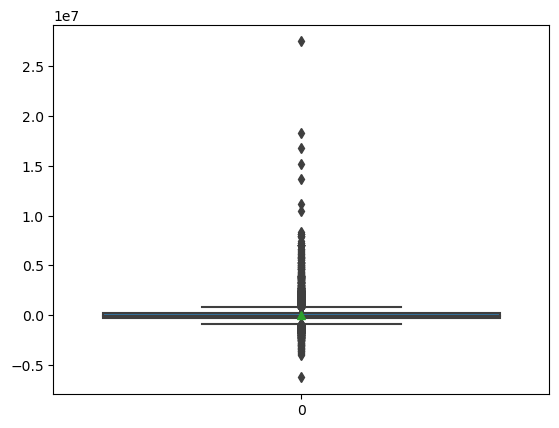

In [64]:
# view boxplot of residuals
sns.boxplot(residuals, showmeans=True)

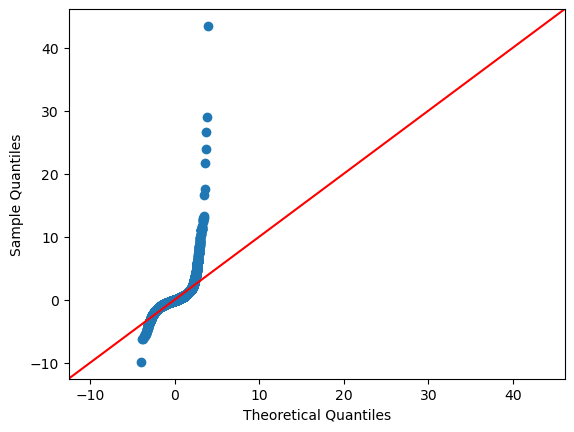

In [65]:
import statsmodels.api as sm

# Assuming residuals is the residuals from your regression model
residuals = df_cleaned['price'] - y_pred  # Update with your actual residuals

# Create and display the Q-Q plot
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()


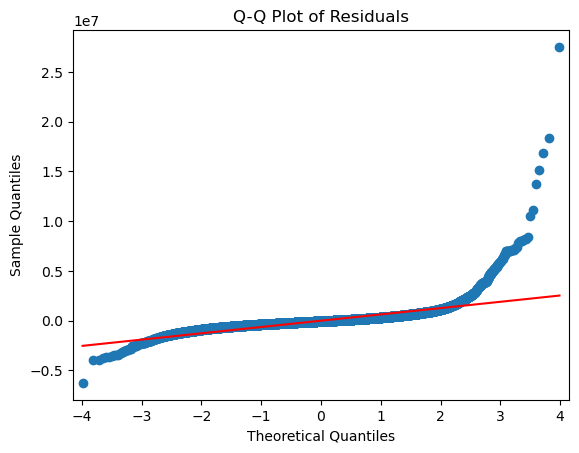

In [66]:
import statsmodels.api as sm

# Assuming residuals is the residuals from your regression model
residuals = df_cleaned['price'] - y_pred  # Update with your actual residuals

# Create and display the Q-Q plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()


((array([-4.07449665, -3.86315055, -3.74770166, ...,  3.74770166,
          3.86315055,  4.07449665]),
  array([-6250173.00652198, -3952792.71930551, -3929283.70764401, ...,
         16793422.98339076, 18326282.21189525, 27497945.56637849])),
 (509366.46698307723, -0.00020116279117421285, 0.8044301933924292))

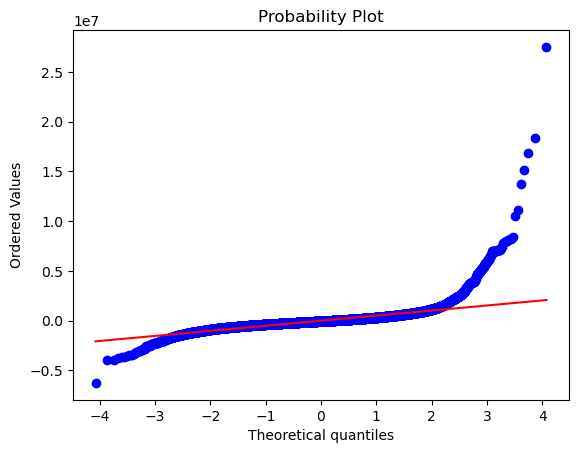

In [67]:
import numpy as np 
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)

In [68]:
# Detection
Q1 = np.percentile(df_cleaned['price'], 25, interpolation='midpoint')
Q3 = np.percentile(df_cleaned['price'], 75, interpolation='midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df_cleaned.shape)

# Upper bound
upper_indices = np.where(df_cleaned['price'] >= (Q3 + 1.5 * IQR))
# Lower bound
lower_indices = np.where(df_cleaned['price'] <= (Q1 - 1.5 * IQR))

# Check if indices exist before dropping
upper_to_drop = df_cleaned.index[upper_indices[0]].tolist()
lower_to_drop = df_cleaned.index[lower_indices[0]].tolist()

df_cleaned = df_cleaned[~df_cleaned.index.isin(upper_to_drop)]
df_cleaned = df_cleaned[~df_cleaned.index.isin(lower_to_drop)]

print("New Shape: ", df_cleaned.shape)


Old Shape:  (30062, 44)
New Shape:  (28076, 44)


<AxesSubplot:>

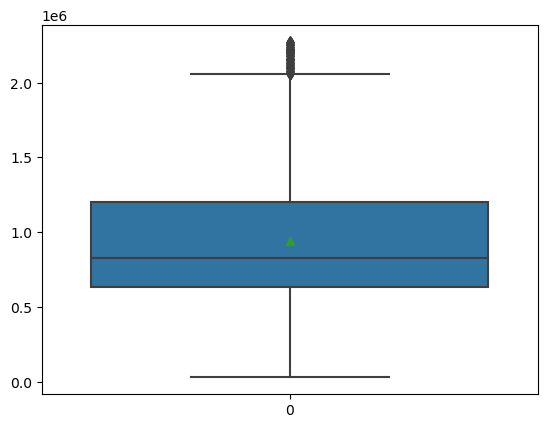

In [69]:
# check charges variable for outliers
sns.boxplot(df_cleaned["price"], showmeans=True)


In [70]:
# create predictors
predictors = .drop(['price'], axis=1)

# create model intercept
predictors_int = sm.add_constant(predictors)

# fit model to data
model = sm.OLS(insurance_df['charges'],predictors_int).fit()

SyntaxError: invalid syntax (1636695814.py, line 2)

In [ ]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'price' is your dependent variable and 'df_cleaned' is your dataframe
target_variable = 'price'
significant_vars_names = [
    # List your significant variable names here
]

# Check if 'const' is in the DataFrame columns
if 'const' not in df_cleaned.columns:
    # If not, add 'const' to the DataFrame
    df_cleaned['const'] = 1

# Create predictors using only statistically significant variables
significant_vars = df_cleaned[significant_vars_names]

# Fit multiple linear regression model to data using only significant variables
model_significant = sm.OLS(df_cleaned[target_variable], significant_vars).fit()

# Return residuals from the model
residuals_significant = model_significant.resid

# View boxplot of residuals
sns.boxplot(residuals_significant, showmeans=True)
plt.title('Boxplot of Residuals (After Removing Outliers and Using Significant Variables)')
plt.show()

# Print model summary
print(model_significant.summary())



In [ ]:
# view model summary
print(model.summary())
